**| Python Source Code |**

"Upaya Penurunan Jumlah Penduduk Miskin di Jawa Barat Melalui Pengembangan Pengambilan Kebijakan Berbasis Data Berdasarkan Pemodelan Regresi Linier Berganda Variabel Dummy"

Team: AFIB

Model: Multiple Linear Regression with Dummy Variables

Note: This source code made with **google colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install statsmodels latest version
!pip install statsmodels==0.13.0

     |████████████████████████████████| 9.8 MB 9.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
# Install plotly latest version
!pip install plotly==5.3.1

     |████████████████████████████████| 23.9 MB 12 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [4]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.stats.descriptivestats import describe
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from scipy import stats

# Preprocessing data

In [ ]:
# Import data jumlah penduduk miskin
jml_penduduk_miskin = pd.read_excel("/content/drive/MyDrive/Lomba/TSDN2021/Data/Jabar - Data Kemiskinan.xlsx",
                                    sheet_name = "Jumlah Penduduk Miskin")
jml_penduduk_miskin.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penduduk_miskin,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,451.3,RIBU JIWA,2002
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,362.2,RIBU JIWA,2002
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,368.6,RIBU JIWA,2002
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,543.3,RIBU JIWA,2002
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,323.7,RIBU JIWA,2002


In [ ]:
# Import data persentase penduduk miskin
persen_penduduk_miskin = pd.read_excel("/content/drive/MyDrive/Lomba/TSDN2021/Data/Jabar - Data Kemiskinan.xlsx",
                                       sheet_name = "Persentase Penduduk Miskin")
persen_penduduk_miskin.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_penduduk,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,9.97,PERSEN,2010
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,10.65,PERSEN,2010
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,14.32,PERSEN,2010
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,9.30,PERSEN,2010
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,13.94,PERSEN,2010


In [ ]:
# Import data angka garis kemiskinan
angka_garis_kemiskinan = pd.read_excel("/content/drive/MyDrive/Lomba/TSDN2021/Data/Jabar - Data Kemiskinan.xlsx",
                                       sheet_name = "Angka Garis Kemiskinan")
angka_garis_kemiskinan.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,garis_kemiskinan_perkapita,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,359787,RUPIAH,2018
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,302213,RUPIAH,2018
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,340882,RUPIAH,2018
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,334929,RUPIAH,2018
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,282683,RUPIAH,2018


In [ ]:
# Import data indeks keparahan kemiskinan
indeks_keparahan_kemiskinan = pd.read_excel("/content/drive/MyDrive/Lomba/TSDN2021/Data/Jabar - Data Kemiskinan.xlsx",
                                            sheet_name = "Indeks Keparahan Kemiskinan")
indeks_keparahan_kemiskinan.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,indeks_keparahan_kemiskinan,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0.26,POIN,2018
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,0.19,POIN,2018
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,0.27,POIN,2018
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,0.20,POIN,2018
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,0.37,POIN,2018


In [ ]:
# Import data pengeluaran perkapita
pengeluaran_perkapita = pd.read_excel("/content/drive/MyDrive/Lomba/TSDN2021/Data/Jabar - Data Kemiskinan.xlsx",
                                      sheet_name = "Pengeluaran Per Kapita")
pengeluaran_perkapita.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,pengeluaran_per_kapita,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,8951.96,RIBU RUPIAH,2010
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,7658.57,RIBU RUPIAH,2010
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,6430.92,RIBU RUPIAH,2010
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,8740.07,RIBU RUPIAH,2010
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,6149.57,RIBU RUPIAH,2010


In [ ]:
# Import data tingkat pengangguran terbuka
tingkat_pengangguran_terbuka = pd.read_excel("/content/drive/MyDrive/Lomba/TSDN2021/Data/Jabar - Data Kemiskinan.xlsx",
                                             sheet_name = "Tingkat Pengangguran Terbuka")
tingkat_pengangguran_terbuka.head()

,Wilayah Jawa Barat,Tingkat Pengangguran Terbuka Kabupaten/Kota (Persen),Unnamed: 2,Unnamed: 3
0,NaN,2018.00,2019.00,2020.00
1,Provinsi Jawa Barat,8.23,8.04,10.46
2,Bogor,9.83,9.11,14.29
3,Sukabumi,7.84,8.05,9.60
4,Cianjur,10.23,9.81,11.05


In [ ]:
tingkat_pengangguran_terbuka_copy = tingkat_pengangguran_terbuka.drop([0,1,(len(tingkat_pengangguran_terbuka) - 1)])
tingkat_pengangguran_terbuka_copy.head()

,Wilayah Jawa Barat,Tingkat Pengangguran Terbuka Kabupaten/Kota (Persen),Unnamed: 2,Unnamed: 3
2,Bogor,9.83,9.11,14.29
3,Sukabumi,7.84,8.05,9.60
4,Cianjur,10.23,9.81,11.05
5,Bandung,5.07,5.51,8.58
6,Garut,7.12,7.35,8.95


In [ ]:
# Positioning data tingkat pengangguran terbuka
tpt = pd.DataFrame({
    "nama_kabupaten_kota": tingkat_pengangguran_terbuka_copy["Wilayah Jawa Barat"].to_list() * 3,
    "tahun": [*([2018] * len(tingkat_pengangguran_terbuka_copy)),
              *([2019] * len(tingkat_pengangguran_terbuka_copy)),
              *([2020] * len(tingkat_pengangguran_terbuka_copy))],
    "tingkat_pengangguran_terbuka": list(tingkat_pengangguran_terbuka_copy.iloc[:,1]) + list(tingkat_pengangguran_terbuka_copy.iloc[:,2]) + list(tingkat_pengangguran_terbuka_copy.iloc[:,3])
})

In [ ]:
tpt.head()

,nama_kabupaten_kota,tahun,tingkat_pengangguran_terbuka
0,Bogor,2018,9.83
1,Sukabumi,2018,7.84
2,Cianjur,2018,10.23
3,Bandung,2018,5.07
4,Garut,2018,7.12


In [ ]:
# Import data angka partisipasi kasar
angka_partisipasi_kasar = pd.read_excel("/content/drive/MyDrive/Lomba/TSDN2021/Data/Jabar - Data Kemiskinan.xlsx",
                                        sheet_name = "Angka Partisipasi Kasar")
angka_partisipasi_kasar.head()

,Wilayah Jawa Barat,Angka Partisipasi Kasar,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,Perguruan Tinggi,NaN,NaN,NaN,NaN,SMA/MA/Paket C,NaN,NaN,NaN,NaN,SMP/MTS/Paket B,NaN,NaN,NaN,NaN,SD/MI/Paket A,NaN,NaN,NaN,NaN
1,NaN,2019,2018.00,2017.00,2016.00,2015.00,2019,2018.00,2017.00,2016.00,2015.00,2019,2018.00,2017.00,2016.00,2015.00,2019,2018.00,2017.00,2016.00,2015.00
2,Provinsi Jawa Barat,21.09,20.93,21.42,20.63,17.76,77.82,75.31,76.48,70.56,70.23,90.75,90.96,88.80,89.58,90.07,105.52,106.24,107.54,108.09,109.42
3,Bogor,25.02,26.63,24.54,18.22,12.64,62.39,62.76,72.94,62.86,67.93,86.49,84.12,81.72,87.69,84.63,106.01,107.91,112.02,113.62,108.82
4,Sukabumi,10.06,10.40,10.42,8.53,10.45,69.16,60.98,67.26,58.97,54.94,87.89,92.15,90.71,92.91,83.00,107.24,110.02,106.40,109.88,113.06


In [ ]:
angka_partisipasi_kasar_copy = angka_partisipasi_kasar.drop([0, 1, 2])
angka_partisipasi_kasar_copy.head()

,Wilayah Jawa Barat,Angka Partisipasi Kasar,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
3,Bogor,25.02,26.63,24.54,18.22,12.64,62.39,62.76,72.94,62.86,67.93,86.49,84.12,81.72,87.69,84.63,106.01,107.91,112.02,113.62,108.82
4,Sukabumi,10.06,10.40,10.42,8.53,10.45,69.16,60.98,67.26,58.97,54.94,87.89,92.15,90.71,92.91,83.00,107.24,110.02,106.40,109.88,113.06
5,Cianjur,5.99,6.44,7.26,5.59,4.12,61.74,58.66,60.03,51.09,43.87,94.11,93.65,88.11,75.37,86.04,103.65,106.09,108.70,114.88,109.50
6,Bandung,20.27,19.56,17.22,17.63,19.74,63.74,66.16,75.89,66.49,66.20,89.99,93.23,83.26,83.55,89.63,105.14,105.33,107.47,105.72,110.04
7,Garut,9.70,10.02,12.32,14.45,6.17,68.58,71.80,64.77,62.34,51.53,90.42,86.01,89.69,83.94,82.17,105.77,106.15,110.44,109.91,111.72


In [ ]:
angka_partisipasi_kasar_copy.shape

(27, 21)

In [ ]:
# Positioning data angka partisipasi kasar
apk = pd.DataFrame({
    "nama_kabupaten_kota": list(angka_partisipasi_kasar_copy["Wilayah Jawa Barat"]) * 5,
    "tahun": [*([2015] * len(angka_partisipasi_kasar_copy)),
              *([2016] * len(angka_partisipasi_kasar_copy)),
              *([2017] * len(angka_partisipasi_kasar_copy)),
              *([2018] * len(angka_partisipasi_kasar_copy)),
              *([2019] * len(angka_partisipasi_kasar_copy))],
    "apk_perguruan_tinggi": list(angka_partisipasi_kasar_copy.iloc[:,5]) + list(angka_partisipasi_kasar_copy.iloc[:,4]) + list(angka_partisipasi_kasar_copy.iloc[:,3]) + list(angka_partisipasi_kasar_copy.iloc[:,2]) + list(angka_partisipasi_kasar_copy.iloc[:,1]),
    "apk_sma": list(angka_partisipasi_kasar_copy.iloc[:,10]) + list(angka_partisipasi_kasar_copy.iloc[:,9]) + list(angka_partisipasi_kasar_copy.iloc[:,8]) + list(angka_partisipasi_kasar_copy.iloc[:,7]) + list(angka_partisipasi_kasar_copy.iloc[:,6]),
    "apk_smp": list(angka_partisipasi_kasar_copy.iloc[:,15]) + list(angka_partisipasi_kasar_copy.iloc[:,14]) + list(angka_partisipasi_kasar_copy.iloc[:,13]) + list(angka_partisipasi_kasar_copy.iloc[:,12]) + list(angka_partisipasi_kasar_copy.iloc[:,11]),
    "apk_sd": list(angka_partisipasi_kasar_copy.iloc[:,20]) + list(angka_partisipasi_kasar_copy.iloc[:,19]) + list(angka_partisipasi_kasar_copy.iloc[:,18]) + list(angka_partisipasi_kasar_copy.iloc[:,17]) + list(angka_partisipasi_kasar_copy.iloc[:,16])
})

In [ ]:
apk.head()

,nama_kabupaten_kota,tahun,apk_perguruan_tinggi,apk_sma,apk_smp,apk_sd
0,Bogor,2015,12.64,67.93,84.63,108.82
1,Sukabumi,2015,10.45,54.94,83,113.06
2,Cianjur,2015,4.12,43.87,86.04,109.5
3,Bandung,2015,19.74,66.2,89.63,110.04
4,Garut,2015,6.17,51.53,82.17,111.72


In [ ]:
# Subset for "tahun" >= 2018
jml_penduduk_miskin_2018 = jml_penduduk_miskin[jml_penduduk_miskin["tahun"] >= 2018]
persen_penduduk_miskin_2018 = persen_penduduk_miskin[persen_penduduk_miskin["tahun"] >= 2018]
angka_garis_kemiskinan_2018 = angka_garis_kemiskinan[angka_garis_kemiskinan["tahun"] >= 2018]
indeks_keparahan_kemiskinan_2018 = indeks_keparahan_kemiskinan[indeks_keparahan_kemiskinan["tahun"] >= 2018]

In [ ]:
# Create a dataframe for initial analysis for poverty measures
df = pd.DataFrame({
    "kode_kabupaten_kota": list(jml_penduduk_miskin_2018["kode_kabupaten_kota"]),
    "nama_kabupaten_kota": list(jml_penduduk_miskin_2018["nama_kabupaten_kota"]),
    "tahun": list(jml_penduduk_miskin_2018["tahun"]),
    "jumlah_penduduk_miskin": list(jml_penduduk_miskin_2018["jumlah_penduduk_miskin"]),
    "persentase_penduduk_miskin": list(persen_penduduk_miskin_2018["persentase_penduduk"]),
    "angka_garis_kemiskinan": list(angka_garis_kemiskinan_2018["garis_kemiskinan_perkapita"]),
    "indeks_keparahan_kemiskinan": list(indeks_keparahan_kemiskinan_2018["indeks_keparahan_kemiskinan"])
})

df.head()

,kode_kabupaten_kota,nama_kabupaten_kota,tahun,jumlah_penduduk_miskin,persentase_penduduk_miskin,angka_garis_kemiskinan,indeks_keparahan_kemiskinan
0,3201,KABUPATEN BOGOR,2018,415.0,7.14,359787,0.26
1,3202,KABUPATEN SUKABUMI,2018,166.3,6.76,302213,0.19
2,3203,KABUPATEN CIANJUR,2018,221.6,9.81,340882,0.27
3,3204,KABUPATEN BANDUNG,2018,246.1,6.65,334929,0.20
4,3205,KABUPATEN GARUT,2018,241.3,9.27,282683,0.37


In [ ]:
# Add column for pengeluaran_perkapita and tingkat_pengangguran_terbuka
df["pengeluaran_perkapita"] = list(pengeluaran_perkapita[pengeluaran_perkapita["tahun"] >= 2018]["pengeluaran_per_kapita"])
df["tingkat_pengangguran_terbuka"] = tpt["tingkat_pengangguran_terbuka"]
df.head()

,kode_kabupaten_kota,nama_kabupaten_kota,tahun,jumlah_penduduk_miskin,persentase_penduduk_miskin,angka_garis_kemiskinan,indeks_keparahan_kemiskinan,pengeluaran_perkapita,tingkat_pengangguran_terbuka
0,3201,KABUPATEN BOGOR,2018,415.0,7.14,359787,0.26,10323.0,9.83
1,3202,KABUPATEN SUKABUMI,2018,166.3,6.76,302213,0.19,8618.0,7.84
2,3203,KABUPATEN CIANJUR,2018,221.6,9.81,340882,0.27,7874.0,10.23
3,3204,KABUPATEN BANDUNG,2018,246.1,6.65,334929,0.20,10203.0,5.07
4,3205,KABUPATEN GARUT,2018,241.3,9.27,282683,0.37,7597.0,7.12


## Forecasting "Angka Partisipasi Kasar" for 2020

Model used for forecasting is linear regression based on year from 2015-2019.

In [ ]:
# Take the name of kabupaten kota
kab_kot = list(angka_partisipasi_kasar_copy["Wilayah Jawa Barat"])
kab_kot

['Bogor',
 'Sukabumi',
 'Cianjur',
 'Bandung',
 'Garut',
 'Tasikmalaya',
 'Ciamis',
 'Kuningan',
 'Cirebon',
 'Majalengka',
 'Sumedang',
 'Indramayu',
 'Subang',
 'Purwakarta',
 'Karawang',
 'Bekasi',
 'Bandung Barat',
 'Pangandaran',
 'Kota Bogor',
 'Kota Sukabumi',
 'Kota Bandung',
 'Kota Cirebon',
 'Kota Bekasi',
 'Kota Depok',
 'Kota Cimahi',
 'Kota Tasikmalaya',
 'Kota Banjar']

In [ ]:
# Create a dictionary for each kabupaten kota
apk_ = {}
for i in kab_kot:
  apk_[i] = apk[apk["nama_kabupaten_kota"] == i]

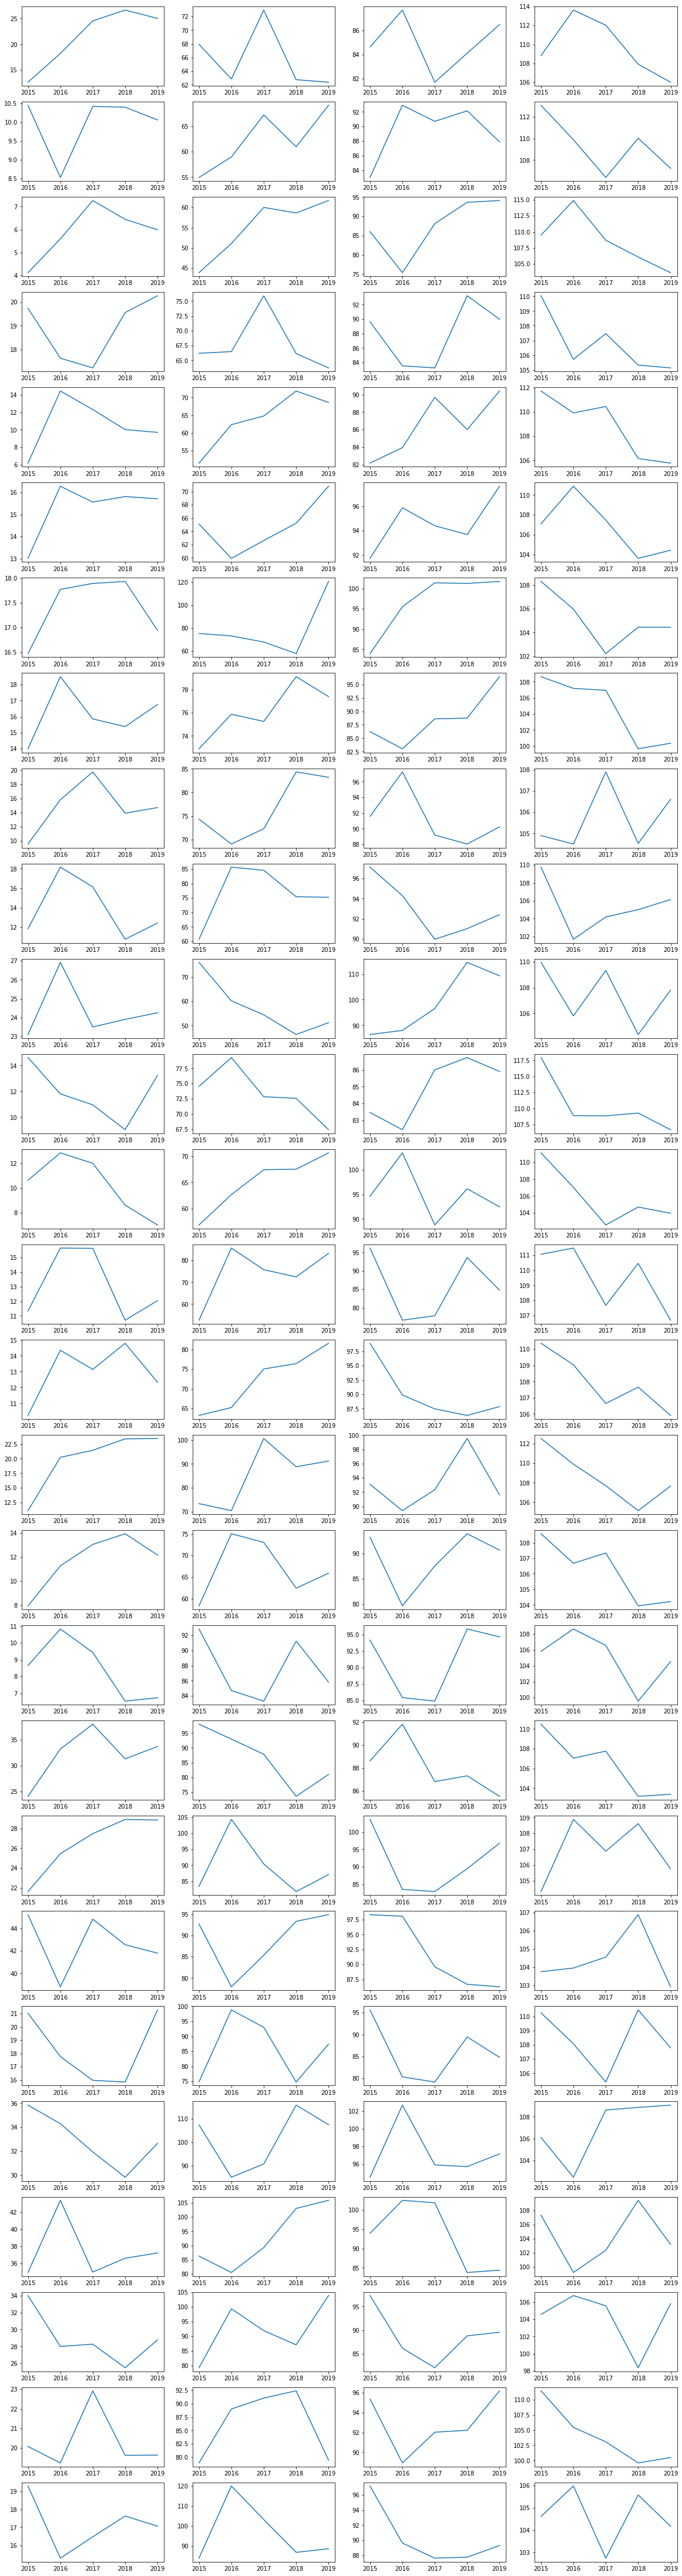

In [ ]:
# Create a line multiplot to get information about the time series pattern
fig, ax = plt.subplots(nrows = len(kab_kot), ncols = 4, figsize = (20,80))

for r in range(len(kab_kot)):
  for c in range(4):
    ax[r,c].plot(apk_[kab_kot[r]]["tahun"], apk_[kab_kot[r]].iloc[:, 2 + c])

plt.show()

# Each row correspond to the name of kabupaten kota
# Each column correspond to each level of education (perguruan tinggi, sma, smp, sd)

In [ ]:
# Forecasting with linear regression
# For each angka partisipasi kasar in kabupaten kota
result_all = []
for var in range(4):
  result_var = []
  for i in kab_kot:
    regressor = LinearRegression()
    regressor.fit(apk_[i]["tahun"].to_numpy().reshape(-1,1),
                  apk_[i].iloc[:, 2 + var])
    result_var.append(float(regressor.predict(np.array([2020]).reshape(-1,1))))
  result_all.append(result_var)

In [ ]:
# Forecast result
result_all

[[31.360999999999876,
  10.299000000000007,
  7.257000000000062,
  19.781000000000063,
  11.321000000000026,
  16.753000000000043,
  17.730000000000018,
  16.824000000000012,
  17.266000000000076,
  12.01299999999992,
  24.117999999999995,
  10.269999999999982,
  6.7590000000000146,
  12.011000000000081,
  14.355999999999995,
  28.272000000000844,
  15.01299999999992,
  5.991999999999962,
  37.26299999999992,
  31.832000000000335,
  41.710000000000036,
  17.954000000000008,
  29.652999999999793,
  36.771000000000015,
  25.014999999999873,
  20.155,
  16.521000000000015],
 [62.422000000000025,
  71.39699999999993,
  68.07099999999991,
  66.12099999999987,
  76.87199999999939,
  69.75800000000027,
  101.59899999999834,
  79.79099999999971,
  86.55299999999897,
  81.98599999999988,
  38.52900000000045,
  67.0610000000006,
  74.81700000000001,
  88.3799999999992,
  86.63600000000042,
  101.07999999999993,
  67.69800000000009,
  85.34500000000003,
  70.55099999999948,
  84.82999999999993,
 

In [ ]:
# Creating a data frame for angka partisipasi kasar in 2020 from forecasting result
apk_2020 = pd.DataFrame({
    "nama_kabupaten_kota": kab_kot,
    "tahun": [2020] * len(kab_kot),
    "apk_perguruan_tinggi": list(map(lambda x: round(x, 2), result_all[0])),
    "apk_sma": list(map(lambda x: round(x, 2), result_all[1])),
    "apk_smp": list(map(lambda x: round(x, 2), result_all[2])),
    "apk_sd": list(map(lambda x: round(x, 2), result_all[3]))
})
apk_2020

,nama_kabupaten_kota,tahun,apk_perguruan_tinggi,apk_sma,apk_smp,apk_sd
0,Bogor,2020,31.36,62.42,84.97,106.28
1,Sukabumi,2020,10.30,71.40,92.04,105.87
2,Cianjur,2020,7.26,68.07,97.78,102.42
3,Bandung,2020,19.78,66.12,91.05,103.68
4,Garut,2020,11.32,76.87,92.02,104.10
5,Tasikmalaya,2020,16.75,69.76,97.56,102.93
6,Ciamis,2020,17.73,101.60,109.17,102.29
7,Kuningan,2020,16.82,79.79,96.43,97.32
8,Cirebon,2020,17.27,86.55,87.69,106.72
9,Majalengka,2020,12.01,81.99,89.14,104.18


In [ ]:
# Concatenate dataframe
apk_done = pd.concat([apk, apk_2020])
apk_done

,nama_kabupaten_kota,tahun,apk_perguruan_tinggi,apk_sma,apk_smp,apk_sd
0,Bogor,2015,12.64,67.93,84.63,108.82
1,Sukabumi,2015,10.45,54.94,83,113.06
2,Cianjur,2015,4.12,43.87,86.04,109.5
3,Bandung,2015,19.74,66.2,89.63,110.04
4,Garut,2015,6.17,51.53,82.17,111.72
...,...,...,...,...,...,...
22,Kota Bekasi,2020,29.65,110.49,96.7,110.7
23,Kota Depok,2020,36.77,111.52,81.92,104.87
24,Kota Cimahi,2020,25.01,103.34,84.89,102.46
25,Kota Tasikmalaya,2020,20.16,87.51,94.42,95.67


In [ ]:
# Merging df
apk_done_2018 = apk_done[apk_done["tahun"] >= 2018]

for i in apk_done_2018.columns[2:]:
  df[i] = list(apk_done_2018[i])

df

,kode_kabupaten_kota,nama_kabupaten_kota,tahun,jumlah_penduduk_miskin,persentase_penduduk_miskin,angka_garis_kemiskinan,indeks_keparahan_kemiskinan,pengeluaran_perkapita,tingkat_pengangguran_terbuka,apk_perguruan_tinggi,apk_sma,apk_smp,apk_sd
0,3201,KABUPATEN BOGOR,2018,415.00,7.14,359787,0.26,10323.0,9.83,26.63,62.76,84.12,107.91
1,3202,KABUPATEN SUKABUMI,2018,166.30,6.76,302213,0.19,8618.0,7.84,10.4,60.98,92.15,110.02
2,3203,KABUPATEN CIANJUR,2018,221.60,9.81,340882,0.27,7874.0,10.23,6.44,58.66,93.65,106.09
3,3204,KABUPATEN BANDUNG,2018,246.10,6.65,334929,0.20,10203.0,5.07,19.56,66.16,93.23,105.33
4,3205,KABUPATEN GARUT,2018,241.30,9.27,282683,0.37,7597.0,7.12,10.02,71.8,86.01,106.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,3275,KOTA BEKASI,2020,134.01,4.38,657953,0.15,15776.0,10.68,29.65,110.49,96.7,110.7
77,3276,KOTA DEPOK,2020,60.43,2.45,688194,0.06,15281.0,9.87,36.77,111.52,81.92,104.87
78,3277,KOTA CIMAHI,2020,31.64,5.11,511375,0.18,12025.0,13.30,25.01,103.34,84.89,102.46
79,3278,KOTA TASIKMALAYA,2020,86.13,12.97,470150,0.39,10263.0,7.99,20.16,87.51,94.42,95.67


In [ ]:
# Saving data to csv
# df.to_csv("/content/drive/MyDrive/Lomba/TSDN2021/Data/Jabar - Data Kemiskinan Clean.csv")

# Modeling

The Data used for modeling comes from 2018-2020 considering the availability of data.

## EDA

Goals for the EDA are:

- Obtaining pattern in data
- Features selection (select predictor variables)

In [5]:
# Import saved data
df = pd.read_csv("/content/drive/MyDrive/Lomba/TSDN2021/Data/Jabar - Data Kemiskinan Clean.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    81 non-null     int64  
 1   kode_kabupaten_kota           81 non-null     int64  
 2   nama_kabupaten_kota           81 non-null     object 
 3   tahun                         81 non-null     int64  
 4   jumlah_penduduk_miskin        81 non-null     float64
 5   persentase_penduduk_miskin    81 non-null     float64
 6   angka_garis_kemiskinan        81 non-null     int64  
 7   indeks_keparahan_kemiskinan   81 non-null     float64
 8   pengeluaran_perkapita         81 non-null     float64
 9   tingkat_pengangguran_terbuka  81 non-null     float64
 10  apk_perguruan_tinggi          81 non-null     float64
 11  apk_sma                       81 non-null     float64
 12  apk_smp                       81 non-null     float64
 13  apk_sd 

Imported data has a column that unnecessary to analyze, which is "Unnamed: 0". Beside of that, "kode_kabupaten_kota" doesn't required for further analysis.

"nama_kabupaten_kota" is an object type of data and it is represent category of each district/city in Jawa Barat province. Furthermore, we need to convert it into dummy variables for modeling purposes.

In [6]:
df = df.drop(["Unnamed: 0", "kode_kabupaten_kota"], axis = 1)
df.head()

,nama_kabupaten_kota,tahun,jumlah_penduduk_miskin,persentase_penduduk_miskin,angka_garis_kemiskinan,indeks_keparahan_kemiskinan,pengeluaran_perkapita,tingkat_pengangguran_terbuka,apk_perguruan_tinggi,apk_sma,apk_smp,apk_sd
0,KABUPATEN BOGOR,2018,415.0,7.14,359787,0.26,10323.0,9.83,26.63,62.76,84.12,107.91
1,KABUPATEN SUKABUMI,2018,166.3,6.76,302213,0.19,8618.0,7.84,10.40,60.98,92.15,110.02
2,KABUPATEN CIANJUR,2018,221.6,9.81,340882,0.27,7874.0,10.23,6.44,58.66,93.65,106.09
3,KABUPATEN BANDUNG,2018,246.1,6.65,334929,0.20,10203.0,5.07,19.56,66.16,93.23,105.33
4,KABUPATEN GARUT,2018,241.3,9.27,282683,0.37,7597.0,7.12,10.02,71.80,86.01,106.15


In [ ]:
# Run this if df comes directly from "preprocessing data" steps

# Changing data type in data frame
# for i in df.columns[-4:]:
#   df[i] = df[i].astype(float, errors = 'raise')

# df.info()

### Continuous Variables

In [ ]:
plot_df = df.loc[:, "jumlah_penduduk_miskin":]
plot_df.head()

,jumlah_penduduk_miskin,persentase_penduduk_miskin,angka_garis_kemiskinan,indeks_keparahan_kemiskinan,pengeluaran_perkapita,tingkat_pengangguran_terbuka,apk_perguruan_tinggi,apk_sma,apk_smp,apk_sd
0,415.0,7.14,359787,0.26,10323.0,9.83,26.63,62.76,84.12,107.91
1,166.3,6.76,302213,0.19,8618.0,7.84,10.40,60.98,92.15,110.02
2,221.6,9.81,340882,0.27,7874.0,10.23,6.44,58.66,93.65,106.09
3,246.1,6.65,334929,0.20,10203.0,5.07,19.56,66.16,93.23,105.33
4,241.3,9.27,282683,0.37,7597.0,7.12,10.02,71.80,86.01,106.15


In [ ]:
# Descriptive statistics
desstat = describe(plot_df).loc[["mean", "median", "max", "min", "std", "jarque_bera", "jarque_bera_pval"], :]
desstat

,jumlah_penduduk_miskin,persentase_penduduk_miskin,angka_garis_kemiskinan,indeks_keparahan_kemiskinan,pengeluaran_perkapita,tingkat_pengangguran_terbuka,apk_perguruan_tinggi,apk_sma,apk_smp,apk_sd
mean,135.001605,7.924444,415045.666667,0.246790,10758.728395,8.586173,19.253951,79.838395,9.160074e+01,104.858519
median,129.180000,8.060000,378287.000000,0.230000,10342.000000,8.680000,16.940000,79.460000,9.066000e+01,104.840000
max,465.670000,12.970000,688194.000000,0.620000,17254.000000,14.290000,42.550000,120.800000,1.205600e+02,110.700000
min,10.070000,2.070000,282683.000000,0.040000,7597.000000,3.590000,5.990000,38.530000,8.113000e+01,95.670000
std,91.527398,2.692536,91680.891279,0.131328,2245.391013,2.204762,9.542802,15.863468,6.978328e+00,2.973457
jarque_bera,27.519407,1.844129,13.280252,15.650579,27.459728,0.179439,6.884183,0.767905,8.212177e+01,4.472195
jarque_bera_pval,0.000001,0.397697,0.001307,0.000400,0.000001,0.914188,0.031998,0.681164,1.470566e-18,0.106875


From the p-value of Jarque Bera and significance level of 5%, we can conclude that "persentase_penduduk_miskin", "tingkat_pengangguran_terbuka", "apk_sma", "apk_sd" is **normal distribute**.

In [ ]:
# Saving the descriptive statistics table in csv format
# desstat.to_csv("/content/drive/MyDrive/Lomba/TSDN2021/Code/Statistika Deskriptif.csv")

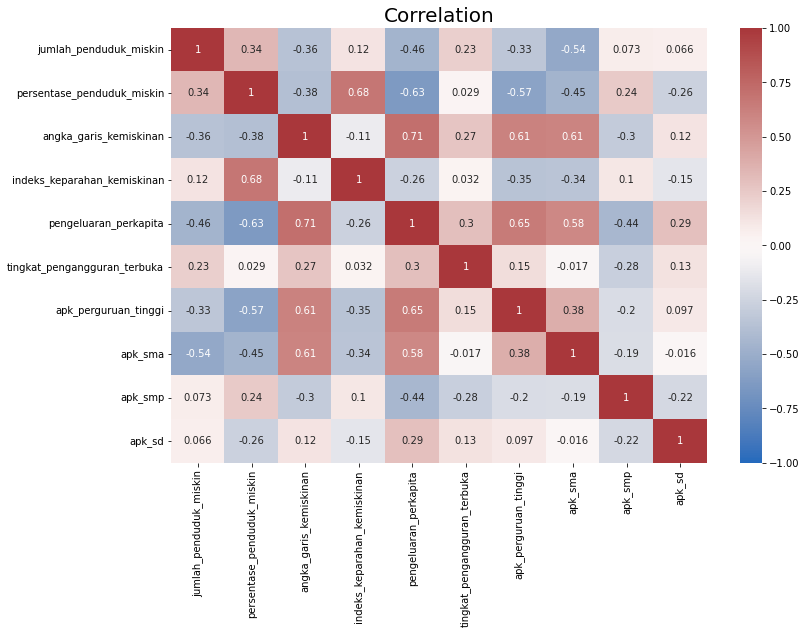

In [ ]:
# Creating a heatmap to get the information about correlation value between continuous variables
plt.figure(figsize = (12,8))

# Spearman correlation used because there are data that was not normal distribute
sns.heatmap(plot_df.corr(method = "spearman"), vmin = -1, vmax = 1, center = 0, annot = True, cmap = "vlag")

plt.title("Correlation", fontsize = 20)
plt.show()

Correlation between variables that greater and equal than 0.5:


**jumlah_penduduk_miskin**:
*   apk_sma


**persentase_penduduk_miskin**:
*   indeks_keparahan_kemiskinan*
*   pengeluaran_perkapita*
*   apk_perguruan_tinggi


**angka_garis_kemiskinan**:
*   pengeluaran_perkapita**
*   apk_perguruan_tinggi*
*   apk_sma*

**indeks_keparahan_kemiskinan**:
*   persentase_penduduk_miskin*


**pengeluaran_perkapita**:
*   persentase_penduduk_miskin*
*   angka_garis_kemiskinan**
*   apk_perguruan_tinggi*
*   apk_sma

**apk_perguruan_tinggi**:
*   persentase_penduduk_miskin
*   angka_garis_kemiskinan*
*   pengeluaran_perkapita*


**apk_sma**:
*   jumlah_penduduk_miskin
*   angka_garis_kemiskinan*
*   pengeluaran_perkapita

If "jumlah_penduduk_miskin" consider to be dependent variable, we can conclude that there are multicolinearity between independent variables.

\* : > 0.6

** : > 0.7

For further investigation, we need to check if there are significant correlation between two corresponding continuous variables within data.

In [ ]:
# Hypothesis testing for spearman correlation
print("Correlation Hypothesis Testing")
for i in range(len(plot_df.columns)):
  for j in range(i + 1, len(plot_df.columns)):
    stat, pval = stats.spearmanr(list(plot_df[plot_df.columns[i]]), list(plot_df[plot_df.columns[j]]))
    print("|", plot_df.columns[i], "and", plot_df.columns[j], "|")
    print("Spearman correlation coefficient =", stat)
    print("P-value =", pval)

    if pval < 0.05:
      print("There are significance correlation between variables")
    else:
      print("There are no significance correlation between variables")
    print()

Correlation Hypothesis Testing
| jumlah_penduduk_miskin and persentase_penduduk_miskin |
Spearman correlation coefficient = 0.34193216918018854
P-value = 0.0017822590552670835
There are significance correlation between variables

| jumlah_penduduk_miskin and angka_garis_kemiskinan |
Spearman correlation coefficient = -0.36181120144534773
P-value = 0.0009037615898608002
There are significance correlation between variables

| jumlah_penduduk_miskin and indeks_keparahan_kemiskinan |
Spearman correlation coefficient = 0.12371592848864181
P-value = 0.2711705340280768
There are no significance correlation between variables

| jumlah_penduduk_miskin and pengeluaran_perkapita |
Spearman correlation coefficient = -0.4592366757000903
P-value = 1.6153961658809106e-05
There are significance correlation between variables

| jumlah_penduduk_miskin and tingkat_pengangguran_terbuka |
Spearman correlation coefficient = 0.22644044838653515
P-value = 0.04207532061922335
There are significance correlation

In [ ]:
# Prepare data for corr test p-value heatmap visualization
pval_cor = {}
for col in range(len(plot_df.columns)):
  col_pval = []
  for row in range(len(plot_df.columns)):
    stat, pval = stats.spearmanr(list(plot_df[plot_df.columns[col]]), list(plot_df[plot_df.columns[row]]))
    col_pval.append(round(pval, 2))
  pval_cor[plot_df.columns[col]] = col_pval

pval_cor = pd.DataFrame(pval_cor)
pval_cor = pval_cor.set_index(pval_cor.columns)
pval_cor

,jumlah_penduduk_miskin,persentase_penduduk_miskin,angka_garis_kemiskinan,indeks_keparahan_kemiskinan,pengeluaran_perkapita,tingkat_pengangguran_terbuka,apk_perguruan_tinggi,apk_sma,apk_smp,apk_sd
jumlah_penduduk_miskin,0.00,0.00,0.00,0.27,0.00,0.04,0.00,0.00,0.52,0.56
persentase_penduduk_miskin,0.00,0.00,0.00,0.00,0.00,0.80,0.00,0.00,0.03,0.02
angka_garis_kemiskinan,0.00,0.00,0.00,0.34,0.00,0.01,0.00,0.00,0.01,0.30
indeks_keparahan_kemiskinan,0.27,0.00,0.34,0.00,0.02,0.78,0.00,0.00,0.35,0.19
pengeluaran_perkapita,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.01
tingkat_pengangguran_terbuka,0.04,0.80,0.01,0.78,0.01,0.00,0.18,0.88,0.01,0.25
apk_perguruan_tinggi,0.00,0.00,0.00,0.00,0.00,0.18,0.00,0.00,0.08,0.39
apk_sma,0.00,0.00,0.00,0.00,0.00,0.88,0.00,0.00,0.09,0.89
apk_smp,0.52,0.03,0.01,0.35,0.00,0.01,0.08,0.09,0.00,0.05
apk_sd,0.56,0.02,0.30,0.19,0.01,0.25,0.39,0.89,0.05,0.00


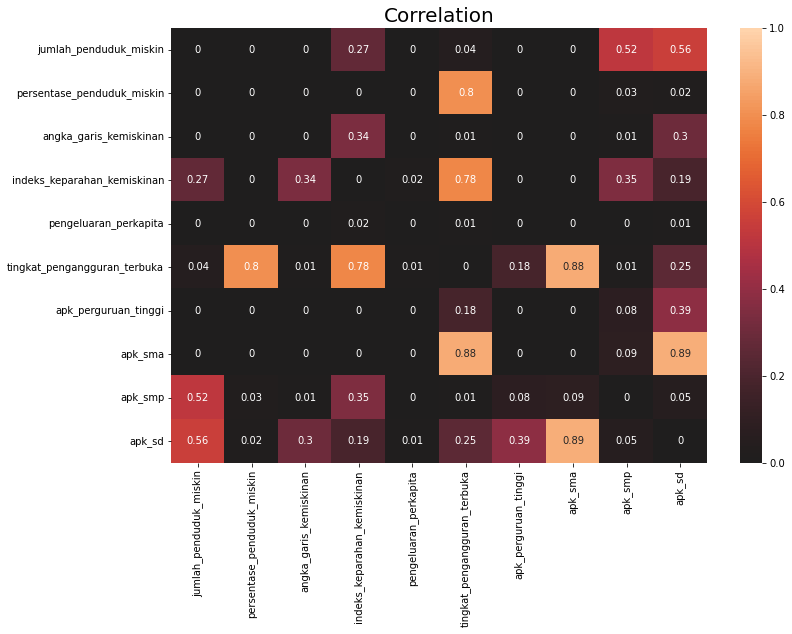

In [ ]:
# Creating a spearman correlation p-value test with heatmap visualization
plt.figure(figsize = (12,8))
sns.heatmap(pval_cor, vmin = 0, vmax = 1, center = 0, annot = True)
plt.title("Correlation", fontsize = 20)
plt.show()

Significant correlation between two corresponding variables can be identify by the p-value in the heatmap diagram above. If p-value below significance level 5%, then the correlation between two corresponding variables are significant.

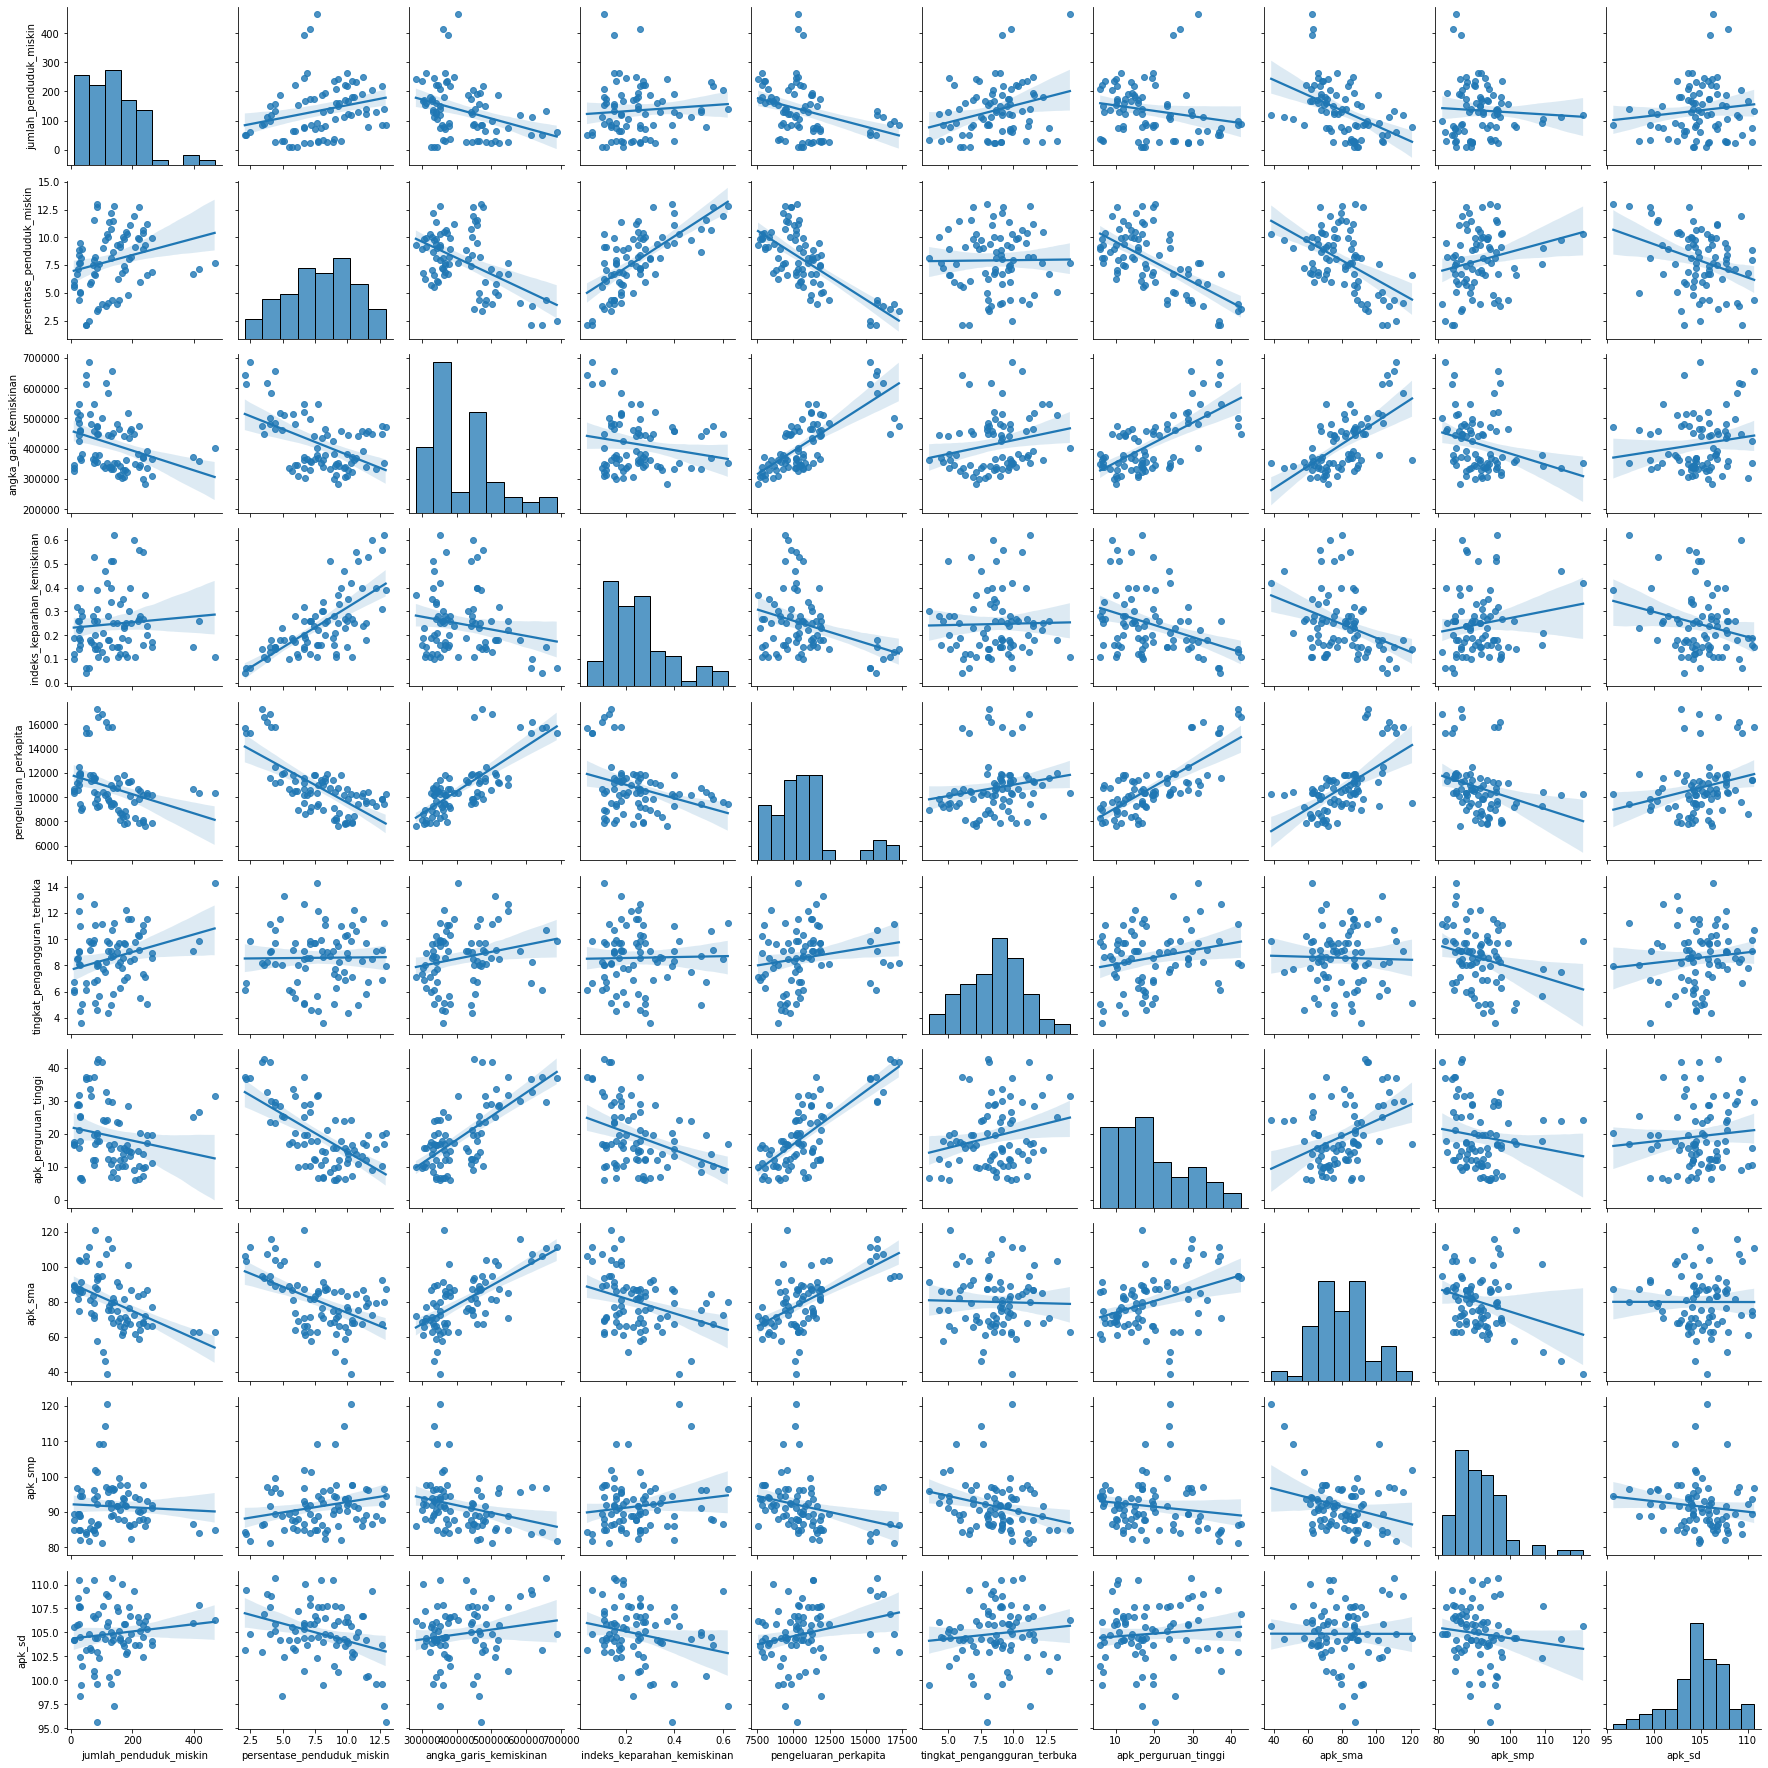

In [ ]:
# Creating pairplot
sns.pairplot(plot_df, kind = 'reg', diag_kind = "hist")
plt.show()

Diagram above consist of two main informations, there are information about the distribution of each variables and regression plot for two corresponding variables. We can refer the normality test of each variables from jarque bera test to histogram plot in diagonal position of plot matrices. We could see that "persentase_penduduk_miskin", "tingkat_pengangguran_terbuka", "apk_sma", and "apk_sd" histogram's shape is about similar to "bell curve" of normal distribution. For the regression plot, we can conclude that majority of the regression plot of each corresponding variables has a good fit with linear model by "eyeballing" the visualization.

### Categorical Variables

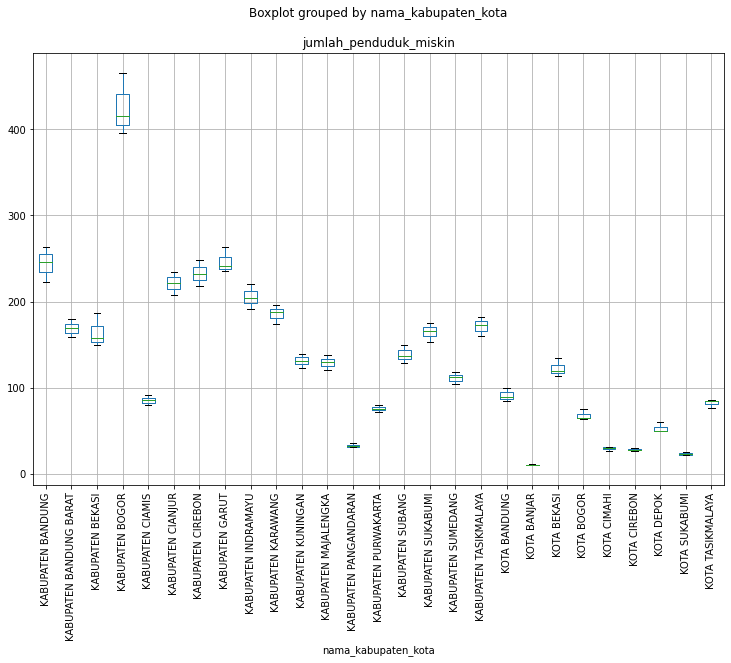

In [ ]:
# Create boxplot for kabupaten kota
df.boxplot("jumlah_penduduk_miskin", by = "nama_kabupaten_kota", figsize = (12,8))
plt.xticks(rotation = 90)
plt.show()

Data for each kabupaten kota consist of three values of "jumlah_penduduk_miskin", each for years in 2018, 2019, and 2020. From the boxplot above, we can see that each kabupaten kota has different range of values. The highest range considered in kabupaten bogor.

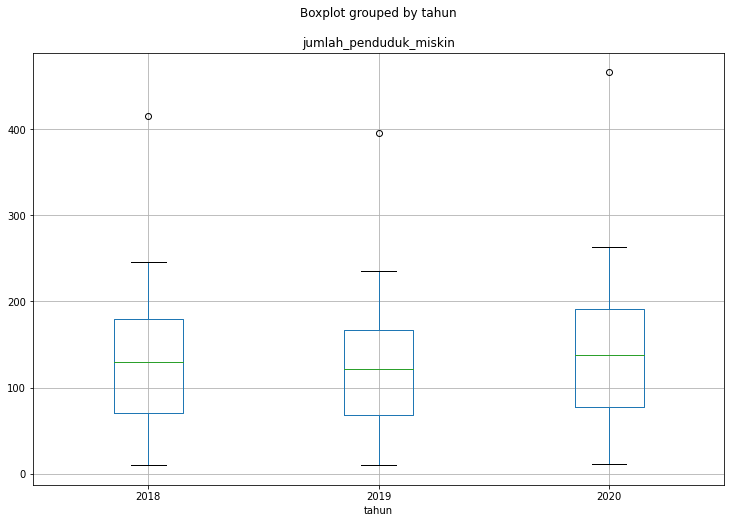

In [ ]:
# Create boxplot for tahun
df.boxplot("jumlah_penduduk_miskin", by = "tahun", figsize = (12,8))
plt.show()

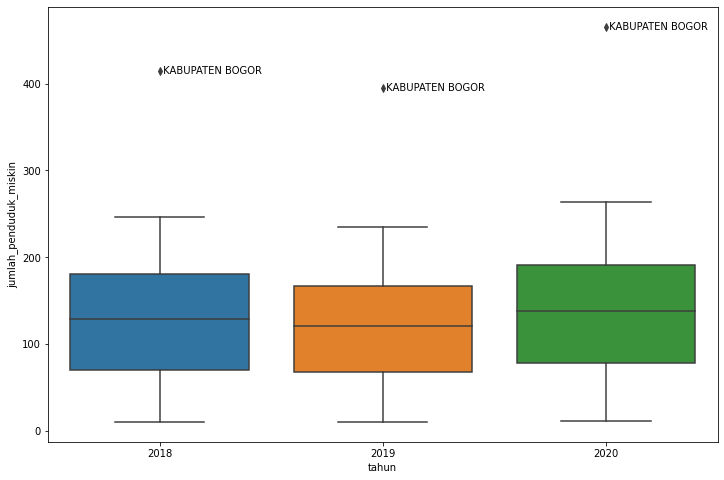

In [ ]:
# Create a boxplot for tahun and highlight the outliers
plt.figure(figsize = (12,8))
sns.boxplot(x = df.tahun, y = df.jumlah_penduduk_miskin)
year_q1 = df.groupby("tahun").quantile(0.25)["jumlah_penduduk_miskin"].to_numpy()
year_q3 = df.groupby("tahun").quantile(0.75)["jumlah_penduduk_miskin"].to_numpy()
outlier_top_lim = year_q3 + 1.5 * (year_q3 - year_q1)
outlier_bottom_lim = year_q1 - 1.5 * (year_q3 - year_q1)

for row in df.itertuples():
  year = row.tahun
  year_ind = year % 2018
  val = row.jumlah_penduduk_miskin
  if val > outlier_top_lim[year_ind] or val < outlier_bottom_lim[year_ind]:
        plt.text(year_ind, val, f' {row.nama_kabupaten_kota}', ha='left', va='center')

plt.show()

Each year has 27 data from each kabupaten kota in Jawa Barat. As you can see that kabupaten bogor become the outliers in each year. Furthermore, we can conclude that the range values of "jumlah_penduduk_miskin" for all years categories is identical.

In [ ]:
# Kruskal wallis test for kabupaten kota
kab_kot = df.nama_kabupaten_kota.tolist()[:27]

kab_kot_dict = {}
for i in kab_kot:
  kab_kot_dict[i] = list(df[df["nama_kabupaten_kota"] == i]["jumlah_penduduk_miskin"])

stat, pval = stats.kruskal(*list(kab_kot_dict.values()))

print("Kruskal Wallis Test")
if pval < 0.05:
  print("There are different in median values for each kabupaten kota")
else:
  print("There are no different in median values for kabupaten kota")
print("statistics = %5.2f" % stat)
print("p-value = %5.2f" % pval)

Kruskal Wallis Test
There are different in median values for each kabupaten kota
statistics = 79.03
p-value =  0.00


In [ ]:
# Kruskal wallis test for tahun
tahun = [2018, 2019, 2020]

tahun_dict = {}
for i in tahun:
  tahun_dict[i] = list(df[df["tahun"] == i]["jumlah_penduduk_miskin"])

stat, pval = stats.kruskal(*list(tahun_dict.values()))

print("Kruskal Wallis Test")
if pval < 0.05:
  print("There are different in median values for each tahun")
else:
  print("There are no different in median values for tahun")
print("statistics = %5.2f" % stat)
print("p-value = %5.2f" % pval)

Kruskal Wallis Test
There are no different in median values for tahun
statistics =  0.79
p-value =  0.68


### Tableau Viz

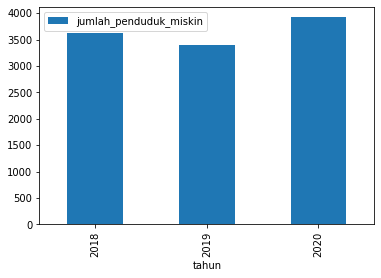

In [ ]:
# Create a barplot for sum of jumlah_penduduk_miskin in years
df.groupby("tahun")[["jumlah_penduduk_miskin"]].sum().plot(kind = "bar")

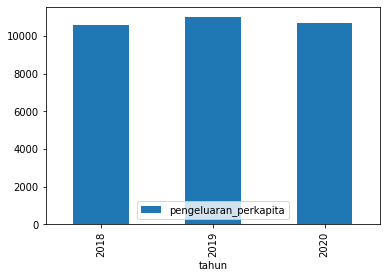

In [ ]:
# Create a barplot for mean of pengeluaran_perkapita in years
df.groupby("tahun")[["pengeluaran_perkapita"]].mean().plot(kind = "bar")

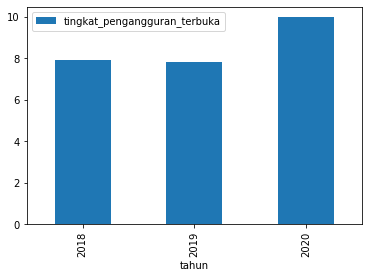

In [ ]:
# Create a barplot for mean of tingkat_pengangguran_terbuka in years
df.groupby("tahun")[["tingkat_pengangguran_terbuka"]].mean().plot(kind = "bar")

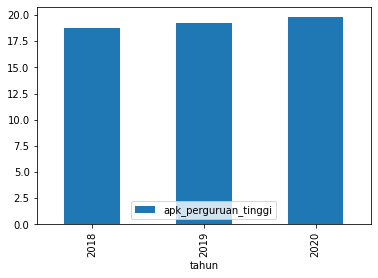

In [ ]:
# Create a barplot for mean of apk_perguruan_tinggi in years
df.groupby("tahun")[["apk_perguruan_tinggi"]].mean().plot(kind = "bar")

Four barplots above shown the difference between each measures of variables in years. Those plots required for Tableau visualization and it has relationship with the modeling result.

As you can see that:

1. jumlah_penduduk_miskin decreased in 2019 and increased in 2020
2. pengeluaran_perkapita increased in 2019 and decreased in 2020
3. tingkat_pengangguran_terbuka significantly increased in 2020
4. apk_perguruan_tinggi increased in 2019 and 2020

#### Maps

In [ ]:
# Import the latitude and longitude data
# Latitude and longitude data achieved from the google bigquery covid-19 open data database
# Google. 2021. Datasets for COVID-19 research, Science & research.
lat_long = pd.read_csv("/content/drive/MyDrive/Lomba/TSDN2021/Data/Latitude Longitude New.csv")
lat_long

,country_name,aggregation_level,subregion1_name,subregion2_name,latitude,longitude
0,Indonesia,2,West Java,Bogor,-6.316667,106.166667
1,Indonesia,2,West Java,Sukabumi,-6.919720,106.927000
2,Indonesia,2,West Java,Cianjur,-6.772500,107.083060
3,Indonesia,2,West Java,Bandung,-7.016667,107.516667
4,Indonesia,2,West Java,Garut,-7.383330,107.766670
5,Indonesia,2,West Java,Tasikmalaya,-7.500000,108.133330
6,Indonesia,2,West Java,Ciamis,-6.750000,108.383333
7,Indonesia,2,West Java,Kuningan,-6.978890,108.480000
8,Indonesia,2,West Java,Cirebon,-6.800000,108.566670
9,Indonesia,2,West Java,Majalengka,-6.816670,108.283330


In [ ]:
# Merging data frame that required for maps
plot_map = df.loc[:, ["nama_kabupaten_kota", "tahun", "jumlah_penduduk_miskin", "persentase_penduduk_miskin"]]
plot_map["latitude"] = list(lat_long["latitude"]) * 3
plot_map["longitude"] = list(lat_long["longitude"]) * 3

In [ ]:
plot_map

,nama_kabupaten_kota,tahun,jumlah_penduduk_miskin,persentase_penduduk_miskin,latitude,longitude
0,KABUPATEN BOGOR,2018,415.00,7.14,-6.316667,106.166667
1,KABUPATEN SUKABUMI,2018,166.30,6.76,-6.919720,106.927000
2,KABUPATEN CIANJUR,2018,221.60,9.81,-6.772500,107.083060
3,KABUPATEN BANDUNG,2018,246.10,6.65,-7.016667,107.516667
4,KABUPATEN GARUT,2018,241.30,9.27,-7.383330,107.766670
...,...,...,...,...,...,...
76,KOTA BEKASI,2020,134.01,4.38,-6.233333,107.000000
77,KOTA DEPOK,2020,60.43,2.45,-6.394000,106.822500
78,KOTA CIMAHI,2020,31.64,5.11,-6.883333,107.533333
79,KOTA TASIKMALAYA,2020,86.13,12.97,-7.333333,108.200000


In [ ]:
plot_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nama_kabupaten_kota         81 non-null     object 
 1   tahun                       81 non-null     int64  
 2   jumlah_penduduk_miskin      81 non-null     float64
 3   persentase_penduduk_miskin  81 non-null     float64
 4   latitude                    81 non-null     float64
 5   longitude                   81 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.9+ KB


In [ ]:
# Create a maps plot
fig = px.scatter_geo(plot_map, lat = 'latitude', lon = 'longitude', animation_frame = 'tahun', color = 'persentase_penduduk_miskin',
                     hover_name = 'nama_kabupaten_kota', projection = 'natural earth', size = 'jumlah_penduduk_miskin',
                     scope = 'asia')
fig.update_geos(fitbounds = 'locations')
fig.show()

Maps plot above needed for Tableau visualization because it represent the overall distribution of jumlah_penduduk_miskin and persentase_penduduk_miskin in each kabupaten kota in Jawa Barat. From the plot we can see that in 2019 the circle size was getting smaller than 2018 and it was getting bigger in 2020.

Also, we can see that kabupaten bogor has the largest circle size (jumlah_penduduk_miskin) than the other kabupaten kota in Jawa Barat.

## Multiple Linear Regression with Dummy Variables

### Data Preparation

Prepare the data before getting into the model fitting.

In [7]:
# One hot encoding kabupaten kota to get the dummy variables for kabupaten kota
df_new = pd.concat([pd.get_dummies(df["nama_kabupaten_kota"]), df.drop(["nama_kabupaten_kota"], axis = 1)], axis = 1)

In [8]:
# Removing tahun and persentase penduduk miskin column
df_new = df_new.drop(["tahun", "persentase_penduduk_miskin"], axis = 1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   KABUPATEN BANDUNG             81 non-null     uint8  
 1   KABUPATEN BANDUNG BARAT       81 non-null     uint8  
 2   KABUPATEN BEKASI              81 non-null     uint8  
 3   KABUPATEN BOGOR               81 non-null     uint8  
 4   KABUPATEN CIAMIS              81 non-null     uint8  
 5   KABUPATEN CIANJUR             81 non-null     uint8  
 6   KABUPATEN CIREBON             81 non-null     uint8  
 7   KABUPATEN GARUT               81 non-null     uint8  
 8   KABUPATEN INDRAMAYU           81 non-null     uint8  
 9   KABUPATEN KARAWANG            81 non-null     uint8  
 10  KABUPATEN KUNINGAN            81 non-null     uint8  
 11  KABUPATEN MAJALENGKA          81 non-null     uint8  
 12  KABUPATEN PANGANDARAN         81 non-null     uint8  
 13  KABUPAT

In [ ]:
df_new.head()

,KABUPATEN BANDUNG,KABUPATEN BANDUNG BARAT,KABUPATEN BEKASI,KABUPATEN BOGOR,KABUPATEN CIAMIS,KABUPATEN CIANJUR,KABUPATEN CIREBON,KABUPATEN GARUT,KABUPATEN INDRAMAYU,KABUPATEN KARAWANG,KABUPATEN KUNINGAN,KABUPATEN MAJALENGKA,KABUPATEN PANGANDARAN,KABUPATEN PURWAKARTA,KABUPATEN SUBANG,KABUPATEN SUKABUMI,KABUPATEN SUMEDANG,KABUPATEN TASIKMALAYA,KOTA BANDUNG,KOTA BANJAR,KOTA BEKASI,KOTA BOGOR,KOTA CIMAHI,KOTA CIREBON,KOTA DEPOK,KOTA SUKABUMI,KOTA TASIKMALAYA,jumlah_penduduk_miskin,angka_garis_kemiskinan,indeks_keparahan_kemiskinan,pengeluaran_perkapita,tingkat_pengangguran_terbuka,apk_perguruan_tinggi,apk_sma,apk_smp,apk_sd
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,415.0,359787,0.26,10323.0,9.83,26.63,62.76,84.12,107.91
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,166.3,302213,0.19,8618.0,7.84,10.40,60.98,92.15,110.02
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,221.6,340882,0.27,7874.0,10.23,6.44,58.66,93.65,106.09
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,246.1,334929,0.20,10203.0,5.07,19.56,66.16,93.23,105.33
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,241.3,282683,0.37,7597.0,7.12,10.02,71.80,86.01,106.15


In [9]:
# Store the name of dummy variables columns
dummy_columns = list(df_new.columns[:27])

In [10]:
# Standard scaling ~ N(0,1)
std_scaler = StandardScaler()

def standard_transform(scaler, Xtrain_data, Xtest_data, dummy_var):
  # Training
  Xtrain_std = scaler.fit_transform(Xtrain_data.drop(dummy_var, axis = 1))
  Xtrain_std = pd.DataFrame(Xtrain_std)
  Xtrain_std.columns = [i for i in Xtrain_data.columns if i not in dummy_var]
  
  # Testing
  Xtest_std = scaler.transform(Xtest_data.drop(dummy_var, axis = 1))
  Xtest_std = pd.DataFrame(Xtest_std)
  Xtest_std.columns = [i for i in Xtest_data.columns if i not in dummy_var]

  Xtrain_data = pd.concat([Xtrain_data[dummy_var], Xtrain_std.set_index(Xtrain_data.index)],
                          axis = 1)
  Xtest_data = pd.concat([Xtest_data[dummy_var], Xtest_std.set_index(Xtest_data.index)],
                         axis = 1)
  
  return Xtrain_data, Xtest_data

In [11]:
# Splitting predictor and response variables
X = df_new.drop(["jumlah_penduduk_miskin"], axis = 1)
y = df_new["jumlah_penduduk_miskin"]

# Splitting data randomly into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Save the mean and standard deviation of each predictors in training data
mean_std = pd.DataFrame()
for i in X_train.columns[27:]:
  mean = X_train[i].mean()
  std = X_train[i].std()
  mean_std[i] = [mean, std]
mean_std["Measures"] = ["mean", "standard_deviation"]
mean_std.set_index("Measures", inplace = True)
# mean_std.to_csv("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Data/mean_std_all.csv")

# Standard scaling variable
X_train, X_test = standard_transform(std_scaler, X_train, X_test, dummy_columns)

In [26]:
X_train.shape, X_test.shape

((64, 35), (17, 35))

In [ ]:
mean_std

,angka_garis_kemiskinan,indeks_keparahan_kemiskinan,pengeluaran_perkapita,tingkat_pengangguran_terbuka,apk_perguruan_tinggi,apk_sma,apk_smp,apk_sd
Measures,,,,,,,,
mean,413967.718750,0.251094,10614.062500,8.564375,18.930156,79.580625,91.592812,104.781562
standard_deviation,91192.169457,0.137888,2091.166978,2.265596,9.277848,16.067692,6.910600,3.164580


### Model Fitting

In [12]:
# Create a function to calculate MAPE
def mape(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mod = sm.OLS(y_train, X_train)
result = mod.fit()
print(result.summary())

                              OLS Regression Results                              
Dep. Variable:     jumlah_penduduk_miskin   R-squared:                       0.998
Model:                                OLS   Adj. R-squared:                  0.995
Method:                     Least Squares   F-statistic:                     361.0
Date:                    Wed, 13 Oct 2021   Prob (F-statistic):           1.61e-30
Time:                            05:30:19   Log-Likelihood:                -185.25
No. Observations:                      64   AIC:                             440.5
Df Residuals:                          29   BIC:                             516.1
Df Model:                              34                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

### Subsetting Model

In [13]:
# Subsetting means to drop predictors one by one from model fitting based on the highest p-value
mod = sm.OLS(y_train, X_train.drop(["apk_sma",
                                    "angka_garis_kemiskinan",
                                    "apk_smp",
                                    "indeks_keparahan_kemiskinan",
                                    "apk_sd",
                                    "KOTA SUKABUMI"], axis = 1))
result = mod.fit()
print(result.summary())

                                   OLS Regression Results                                  
Dep. Variable:     jumlah_penduduk_miskin   R-squared (uncentered):                   0.999
Model:                                OLS   Adj. R-squared (uncentered):              0.998
Method:                     Least Squares   F-statistic:                              1231.
Date:                    Sun, 24 Oct 2021   Prob (F-statistic):                    5.18e-45
Time:                            07:54:12   Log-Likelihood:                         -193.44
No. Observations:                      64   AIC:                                      444.9
Df Residuals:                          35   BIC:                                      507.5
Df Model:                              29                                                  
Covariance Type:                nonrobust                                                  
                                   coef    std err          t      P>|t|      [0

In [ ]:
# Create a data frame for all the coefficient value
err_series = result.params - result.conf_int()[0]
coef_df = pd.DataFrame({'coef': result.params.values,
                        'err': err_series.values,
                        'varname': err_series.index.values
})

In [ ]:
coef_df

,coef,err,varname
0,244.401710,9.567641,KABUPATEN BANDUNG
1,133.421553,22.106877,KABUPATEN BANDUNG BARAT
2,156.549504,12.277526,KABUPATEN BEKASI
3,401.438418,13.375241,KABUPATEN BOGOR
4,75.950977,16.348301,KABUPATEN CIAMIS
5,188.252188,26.239230,KABUPATEN CIANJUR
6,223.586339,11.108810,KABUPATEN CIREBON
7,204.830028,32.530312,KABUPATEN GARUT
8,212.567116,13.759387,KABUPATEN INDRAMAYU
9,207.245554,14.338085,KABUPATEN KARAWANG


In [ ]:
coef_df.sort_values("coef", ascending = False).head()

,coef,err,varname
3,401.438418,13.375241,KABUPATEN BOGOR
0,244.401710,9.567641,KABUPATEN BANDUNG
6,223.586339,11.108810,KABUPATEN CIREBON
8,212.567116,13.759387,KABUPATEN INDRAMAYU
9,207.245554,14.338085,KABUPATEN KARAWANG


In [ ]:
# Saving coefficient df
# coef_df.to_csv("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Data/All Data Coefficient Plot.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if __name__ == '__main__':


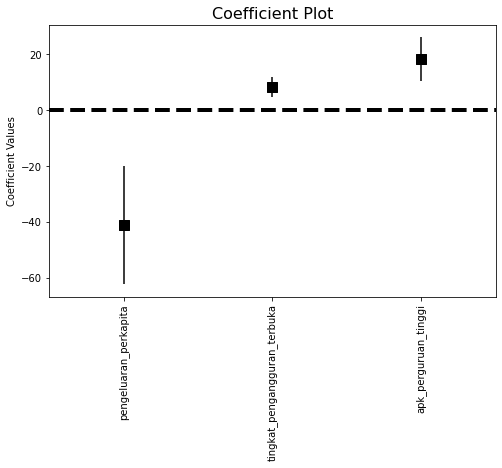

In [ ]:
# Create a coefficient plot for non dummy variables
fig, ax = plt.subplots(figsize=(8, 5))
coef_df = coef_df.loc[26:, :]
coef_df.plot(x = 'varname', y = 'coef', kind = 'bar', 
             ax = ax, color = 'none', 
             yerr = 'err', legend = False)
ax.set_ylabel('Coefficient Values')
ax.set_xlabel('')
ax.scatter(x = pd.np.arange(coef_df.shape[0]), 
           marker = 's', s = 120, 
           y = coef_df['coef'], color = 'black')
ax.axhline(y = 0, linestyle = '--', color = 'black', linewidth = 4)
_ = ax.set_xticklabels(coef_df['varname'], 
                       rotation=90)
ax.set_title("Coefficient Plot", fontsize = 16)
plt.show()
# plt.savefig("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Coefficient Plot.png")

From the coefficient values we can see that pengeluaran_perkapita has the highest contribution to the jumlah_penduduk_miskin. Followed by apk_perguruan_tingg and tingkat_pengangguran_terbuka.

### Checking Model Assumption

In [ ]:
print(result.summary())

                                   OLS Regression Results                                  
Dep. Variable:     jumlah_penduduk_miskin   R-squared (uncentered):                   0.999
Model:                                OLS   Adj. R-squared (uncentered):              0.998
Method:                     Least Squares   F-statistic:                              1231.
Date:                    Wed, 13 Oct 2021   Prob (F-statistic):                    5.18e-45
Time:                            05:39:58   Log-Likelihood:                         -193.44
No. Observations:                      64   AIC:                                      444.9
Df Residuals:                          35   BIC:                                      507.5
Df Model:                              29                                                  
Covariance Type:                nonrobust                                                  
                                   coef    std err          t      P>|t|      [0

Assumption:
-  Normality of residuals has been fulfilled with Prob(JB) > 5%
-  There are indication of multicolinearity because of Cond. No. > 20

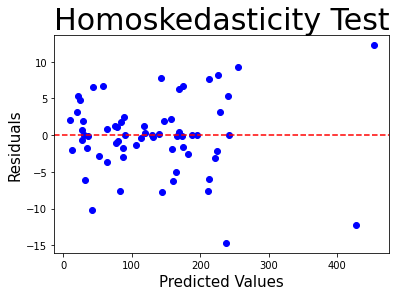

In [14]:
# Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(result.fittedvalues, result.resid, color = "blue")
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel("Predicted Values", fontsize = 15)
ax.set_ylabel("Residuals", fontsize = 15)
ax.set_title("Homoskedasticity Test", fontsize = 30)
plt.show()

There are no indication of heteroskedasticity from the plot above.

#####     

In [ ]:
from statsmodels.stats.diagnostic import het_white, het_goldfeldquandt
from statsmodels.compat import lzip

In [22]:
# White test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = het_white(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 64.0),
 ('p-value', 0.44117997461167985),
 ('f-value', nan),
 ('f p-value', nan)]

In [23]:
# Goldfeld-Quandt test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = het_goldfeldquandt(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 1.0644916664879618),
 ('p-value', 0.47304328236967147),
 ('f-value', 'increasing')]

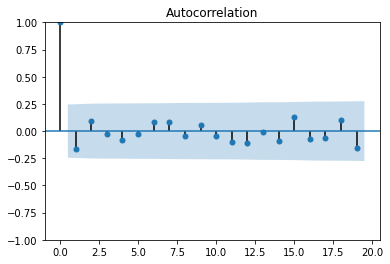

In [ ]:
# Using acf and pacf plot to help visualize autocorrelation indication
plot_acf(y_train, alpha = 0.05)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


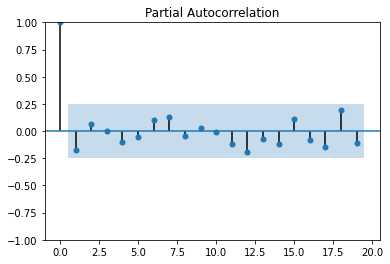

In [ ]:
plot_pacf(y_train, alpha = 0.05)
plt.show()

There are no autocorrelation.

### Partial Dependence Plot

We could interpret the model coefficient furthermore using partial dependence plot with two reference line, each for the mean of prediction (y-axis) and the mean of corresponding predictor (x-axis).

In [ ]:
# Calculate and plot the dependence value
def partial_dependence(X_data, var_name, model_obj, n_generate = 100):
  X_data = X_data.copy()
  var_value = np.linspace(X_data[var_name].min(), X_data[var_name].max(), num = n_generate)

  ypred_mean = []
  for i in var_value:
    X_data[var_name] = i
    ypred = model_obj.predict(X_data)
    ypred_mean.append(ypred.mean())
  
  return var_value, ypred_mean

def partial_dependence_plot(X_data, var_name, model_obj, n_generate = 100, save = False, path = None):
  X_data = X_data.copy()
  var_value, ypred_mean = partial_dependence(X_data, var_name, model_obj, n_generate)
  
  plt.figure(figsize = (8, 6))
  plt.plot(var_value, ypred_mean)
  plt.plot(var_value, [model_obj.predict(X_data).mean()] * len(var_value), linestyle = "dashed", label = "E[f(x)]")
  plt.plot([X_data[var_name].mean()] * len(ypred_mean), ypred_mean, linestyle = "dashed", label = "E[" + var_name + "]")
  plt.xlabel(var_name)
  plt.ylabel("E[f(x)|" + var_name + "]")
  plt.title("Partial Dependence Plot: " + var_name, fontsize = 20)
  plt.legend()
  
  if save == False:
    plt.show()
  else:
    plt.savefig(path + "/Partial Dependence Plot " + var_name + ".png")

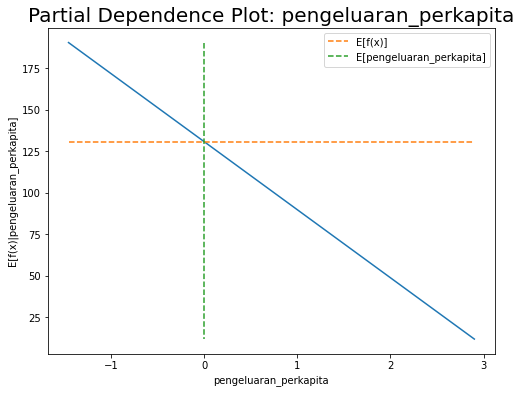

In [ ]:
# pengeluaran perkapita
partial_dependence_plot(X_train.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1),
                        "pengeluaran_perkapita", result)

In [ ]:
# Print the mean of pengeluaran_perkapita
mean_std["pengeluaran_perkapita"][0]

10614.0625

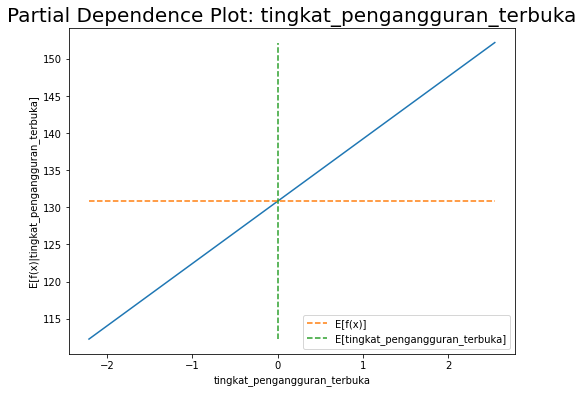

In [ ]:
# tingkat pengangguran terbuka
partial_dependence_plot(X_train.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1),
                        "tingkat_pengangguran_terbuka", result)

In [ ]:
# Print the mean of tingkat_pengangguran_terbuka
mean_std["tingkat_pengangguran_terbuka"][0]

8.564375

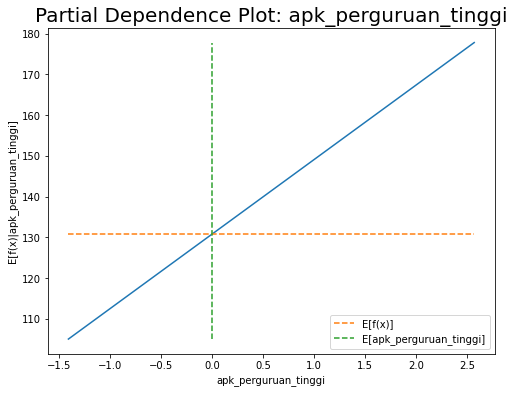

In [ ]:
# apk perguruan tinggi
partial_dependence_plot(X_train.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1),
                        "apk_perguruan_tinggi", result)

In [ ]:
# Print the mean of apk_perguruan_tinggi
mean_std["apk_perguruan_tinggi"][0]

18.93015625

##### Saving Partial Dependence Data

In [ ]:
# pengeluaran perkapita
var_range, ypredmean = partial_dependence(X_train.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1),
                                          "pengeluaran_perkapita", result)
predmean = result.predict(X_train.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1)).mean()
dependence_pengeluaran_perkapita = pd.DataFrame({
    "pengeluaran_perkapita": var_range,
    "dependence value": ypredmean,
    "ypred_mean": [predmean] * len(var_range),
    "pengeluaran_perkapita_mean": [X_train['pengeluaran_perkapita'].mean()] * len(var_range)
})
# dependence_pengeluaran_perkapita.to_csv("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Data/Data dependence plot pengeluaran perkapita.csv")

In [ ]:
# tingkat pengangguran terbuka
var_range, ypredmean = partial_dependence(X_train.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1),
                                          "tingkat_pengangguran_terbuka", result)
predmean = result.predict(X_train.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1)).mean()
dependence_tingkat_pengangguran_terbuka = pd.DataFrame({
    "tingkat_pengangguran_terbuka": var_range,
    "dependence value": ypredmean,
    "ypred_mean": [predmean] * len(var_range),
    "pengeluaran_perkapita_mean": [X_train['tingkat_pengangguran_terbuka'].mean()] * len(var_range)
})
# dependence_tingkat_pengangguran_terbuka.to_csv("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Data/Data dependence plot tingkat pengangguran terbuka.csv")

In [ ]:
# apk perguruan tinggi
var_range, ypredmean = partial_dependence(X_train.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1),
                                          "apk_perguruan_tinggi", result)
predmean = result.predict(X_train.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1)).mean()
dependence_apk_perguruan_tinggi = pd.DataFrame({
    "apk_perguruan_tinggi": var_range,
    "dependence value": ypredmean,
    "ypred_mean": [predmean] * len(var_range),
    "pengeluaran_perkapita_mean": [X_train['apk_perguruan_tinggi'].mean()] * len(var_range)
})
# dependence_apk_perguruan_tinggi.to_csv("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Data/Data dependence plot apk perguruan tinggi.csv")

### Prediction Performance of Interpreted Model

In [ ]:
# prediction for data train
print("Training Data")
print("RMSE :", mean_squared_error(y_train, result.fittedvalues, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_train, result.fittedvalues))
print("MAPE :", mape(y_train, result.fittedvalues))

Training Data
RMSE : 4.970487847467281
MAE : 3.53791561529609
MAPE : 4.607526755307193


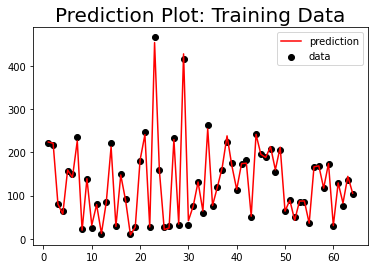

In [ ]:
plt.plot([i for i in range(1, len(result.fittedvalues) + 1)], result.fittedvalues, color = 'red', label = 'prediction')
plt.scatter([i for i in range(1, len(y_train) + 1)], y_train, color = 'black', label = 'data')
plt.title('Prediction Plot: Training Data', fontsize = 20)
plt.legend()
plt.show()
# plt.savefig("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Training Data Prediction Plot.png")

In [ ]:
# Saving prediction data for train data
pred_save_train = pd.DataFrame({
    "index": [i for i in range(1, len(y_train) + 1)],
    "nama_kabupaten_kota": df.loc[y_train.index, "nama_kabupaten_kota"],
    "tahun": df.loc[y_train.index, "tahun"],
    "data_asli": y_train,
    "prediksi": result.fittedvalues
}).reset_index().drop("level_0", axis = 1)
# pred_save_train.to_csv("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Data/Data Training Hasil Prediksi.csv")

In [ ]:
# Saving prediction data for train data with predictor
predictor_train = X_train.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1).reset_index().drop("index", axis = 1)
all_train_pred_data = pd.concat([pred_save_train, predictor_train], axis = 1).set_index("index")
# all_train_pred_data.to_csv("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Data/Data Training Hasil Prediksi dan Prediktor.csv")

In [ ]:
# Prediction for data test
ypred = result.predict(X_test.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1))

print("Testing Data")
print("RMSE :", mean_squared_error(y_test, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_test, ypred))
print("MAPE :", mape(y_test, ypred))

Testing Data
RMSE : 10.472310912256951
MAE : 8.77756608047462
MAPE : 11.407276446285525


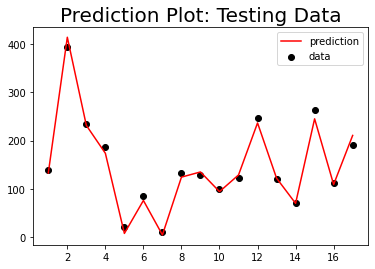

In [ ]:
plt.plot([i for i in range(1, len(ypred) + 1)], ypred, color = 'red', label = 'prediction')
plt.scatter([i for i in range(1, len(y_test) + 1)], y_test, color = 'black', label = 'data')
plt.title('Prediction Plot: Testing Data', fontsize = 20)
plt.legend()
plt.show()
# plt.savefig("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Data Testing Prediction Plot.png")

In [ ]:
# Saving prediction data for test data
pred_save = pd.DataFrame({
    "index": [i for i in range(1, len(y_test) + 1)],
    "nama_kabupaten_kota": df.loc[y_test.index, "nama_kabupaten_kota"],
    "tahun": df.loc[y_test.index, "tahun"],
    "data_asli": y_test,
    "prediksi": ypred
}).reset_index().drop("level_0", axis = 1)
# pred_save.to_csv("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Data/Data Testing Hasil Prediksi.csv")

In [ ]:
# Saving prediction data for train data with predictor
predictor_test = X_test.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1).reset_index().drop("index", axis = 1)
all_test_pred_data = pd.concat([pred_save, predictor_test], axis = 1).set_index("index")
# all_test_pred_data.to_csv("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Data/Data Testing Hasil Prediksi dan Prediktor.csv")

In [ ]:
# Saving prediction metrics
metrics_save = pd.DataFrame({
    "Ukuran": ["RMSE", "MAE", "MAPE"],
    "Training": [mean_squared_error(y_train, result.fittedvalues, squared = False),
                 mean_absolute_error(y_train, result.fittedvalues),
                 mape(y_train, result.fittedvalues)],
    "Testing": [mean_squared_error(y_test, ypred, squared = False),
                mean_absolute_error(y_test, ypred),
                mape(y_test, ypred)]
})
# metrics_save.to_csv("/content/drive/MyDrive/Lomba/TSDN2021/Plot Model/Data Ukuran Kebaikan Model.csv")

In [ ]:
# K-Fold Cross Validation
kfold_generator = KFold(n_splits = 5)

def kfold_cv(Xdata, ydata, kfold_class, scaler, dummy_var):
  rmse = []
  mae = []
  mape_ = []

  for train, test in kfold_generator.split(Xdata, ydata):
    Xtrain_fold = Xdata.iloc[train, :]
    ytrain_fold = ydata[train]
    Xtest_fold = Xdata.iloc[test, :]
    ytest_fold = ydata[test]

    Xtrain_fold, Xtest_fold = standard_transform(scaler, Xtrain_fold, Xtest_fold, dummy_var)

    model = sm.OLS(y_train, X_train.drop(["apk_sma",
                                    "angka_garis_kemiskinan",
                                    "apk_smp",
                                    "indeks_keparahan_kemiskinan",
                                    "apk_sd",
                                    "KOTA SUKABUMI"], axis = 1))
    model = model.fit()

    ypred_fold = model.predict(Xtest_fold.drop(["apk_sma", "angka_garis_kemiskinan", "apk_smp", "indeks_keparahan_kemiskinan", "apk_sd", "KOTA SUKABUMI"], axis = 1))
    rmse.append(mean_squared_error(ytest_fold, ypred_fold, squared = False))
    mae.append(mean_absolute_error(ytest_fold, ypred_fold))
    mape_.append(mape(ytest_fold, ypred_fold))
  
  result = {
      "RMSE": rmse,
      "MAE": mae,
      "MAPE": mape_
  }
  return result

kfold_cv_result = kfold_cv(X, y, kfold_generator, std_scaler, dummy_columns)

In [ ]:
# printing result
for i, val in kfold_cv_result.items():
  print(i)
  print("Result for each cv =", val)
  print("Mean =", sum(val)/len(val))
  print()

RMSE
Result for each cv = [6.73299294487195, 7.276472105759752, 6.589021535346936, 6.020087895173603, 7.095556986304113]
Mean = 6.742826293491271

MAE
Result for each cv = [4.737232348795773, 5.192986327912713, 4.5225179284301165, 4.551458158547871, 5.799556177041314]
Mean = 4.960750188145558

MAPE
Result for each cv = [3.0198414263632967, 6.2976792729652855, 7.814437762176943, 3.506443256649172, 11.342393398939953]
Mean = 6.39615902341893



From the K-Fold Cross Validation we can conclude that multiple linear regression with dummy variables has reasonably good performance for fitting and predicting the data based on RMSE, MAE, and MAPE values. As you can see that the mean of each RMSE, MAE, and MAPE is below 10.